# Web Intelligence
## Classification I

#### Prof. Claudio Lucchese

## Introduction

- **Classification** is a form of data analysis that extracts models describing important data classes. 


- Such models, called **classifiers**, predict categorical (discrete, unordered) **class labels**. 
  - For example, we can build a classification model to categorize bank loan applications as either safe or risky. 

- In contrast, **regression analysis** is a statistical methodology that is most often used for **numeric prediction**


- Data classification is a two-step process, consisting of a **learning/training step** (where a classification model is constructed) and a **classification step** (where the model is used to predict class labels for given data).


- **Training Step** 
  - A tuple, X, is represented by an n-dimensional attribute vector.
  - plus a class label attribute


- Because the class label of each training tuple is provided, this step is also known as **supervised learning**
  - It contrasts with unsupervised learning (or clustering)


- **Classification/Test Step** 
  - The **accuracy** of a classifier on a given test set is the percentage of test set tuples that are correctly classified by the classifier.


# Wine dataset

Url: http://archive.ics.uci.edu/ml/datasets/Wine?ref=datanews.io


These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines. 


The attributes are:
0. Quality (1-3)
1. Alcohol 
1. Malic acid 
1. Ash 
1. Alcalinity of ash 
1. Magnesium 
1. Total phenols 
1. Flavanoids 
1. Nonflavanoid phenols 
1. Proanthocyanins 
1. Color intensity 
1. Hue 
1. OD280/OD315 of diluted wines 
1. Proline 


In [1]:
import numpy as np
import pandas as pd

data_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
df = pd.read_csv(data_url, header=None)

In [2]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
0,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
1,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
2,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
3,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
4,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
5,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
6,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
7,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
8,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
9,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
0     178 non-null int64
1     178 non-null float64
2     178 non-null float64
3     178 non-null float64
4     178 non-null float64
5     178 non-null int64
6     178 non-null float64
7     178 non-null float64
8     178 non-null float64
9     178 non-null float64
10    178 non-null float64
11    178 non-null float64
12    178 non-null float64
13    178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [5]:
# data preparation
dataset = df.astype(float).values
print("dataset shape", dataset.shape)

print(dataset)

# get features by removing id and class
# remove id
X = dataset[:,1:]
print("X shape", X.shape)

# get class label
y = dataset[:,0]
print("y shape", y.shape)
print (y)

dataset shape (178, 14)
[[1.000e+00 1.423e+01 1.710e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.000e+00 1.320e+01 1.780e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.000e+00 1.316e+01 2.360e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [3.000e+00 1.327e+01 4.280e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [3.000e+00 1.317e+01 2.590e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [3.000e+00 1.413e+01 4.100e+00 ... 6.100e-01 1.600e+00 5.600e+02]]
X shape (178, 13)
y shape (178,)
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3.

## k-Nearest-Neighbor Classifiers


- lazy learner
- Nearest-neighbor classifiers are based on learning by analogy, that is, by comparing a given test tuple with training tuples that are similar to it. 
- Scikit Learn:
    - see https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier
    - by default Euclidean distance is used


In [6]:
from sklearn import neighbors

kNN = neighbors.KNeighborsClassifier(n_neighbors=10)
kNN.fit(X,y)

y_pred = kNN.predict(X)


print ("predicted", y_pred)
print ("true", y)


from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# compute Accuracy
print ("Accuracy")
print ( accuracy_score(y_true=y, y_pred=y_pred) )

predicted [1. 1. 1. 1. 3. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 3. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 3. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 3. 2. 3. 2. 2. 2. 2. 2. 1. 2. 1. 2.
 2. 1. 1. 2. 2. 2. 1. 2. 2. 3. 3. 2. 3. 2. 2. 2. 2. 3. 2. 2. 2. 2. 2. 1.
 3. 2. 2. 2. 3. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 2. 3. 2. 2. 2. 2. 2. 2. 2.
 3. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 3. 2. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 2. 2. 3. 3. 3. 2. 2. 3. 3. 3. 2. 1. 3. 2. 2. 3. 3. 3. 2. 2. 3. 2.
 3. 3. 2. 2. 3. 3. 3. 1. 1. 3.]
true [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 

## What's the impact of k?

In [9]:
from sklearn import neighbors
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

for k in range(1,10):

    kNN = neighbors.KNeighborsClassifier(n_neighbors=k)
    kNN.fit(X,y)

    y_pred = kNN.predict(X)

    # compute Accuracy
    # compute Accuracy
    print ("k:", k," | Accuracy:", accuracy_score(y_true=y, y_pred=y_pred) )

k: 1  | Accuracy: 1.0
k: 2  | Accuracy: 0.8764044943820225
k: 3  | Accuracy: 0.8707865168539326
k: 4  | Accuracy: 0.8258426966292135
k: 5  | Accuracy: 0.7865168539325843
k: 6  | Accuracy: 0.7752808988764045
k: 7  | Accuracy: 0.7471910112359551
k: 8  | Accuracy: 0.7752808988764045
k: 9  | Accuracy: 0.7752808988764045


## That's cheating!

We are not testing accuracy on **novel** instances !


We simulate novel instances by splitting the available data in to a **training** and a **test** set.

In [7]:
from sklearn import neighbors
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


for k in range(1,10):

    kNN = neighbors.KNeighborsClassifier(n_neighbors=k)
    kNN.fit(X_train,y_train)

    y_pred = kNN.predict(X_test)

    # compute Accuracy
    print ("k:", k," | Accuracy:", accuracy_score(y_true=y_test, y_pred=y_pred) )

k: 1  | Accuracy: 0.7796610169491526
k: 2  | Accuracy: 0.6949152542372882
k: 3  | Accuracy: 0.6949152542372882
k: 4  | Accuracy: 0.6440677966101694
k: 5  | Accuracy: 0.6779661016949152
k: 6  | Accuracy: 0.6779661016949152
k: 7  | Accuracy: 0.711864406779661
k: 8  | Accuracy: 0.6779661016949152
k: 9  | Accuracy: 0.6779661016949152


## Choosing the value of K:   

- If K too small, sensitive to noise points   
- If K too large, it can be computationally expensive
    - what if K is very large, e.g., $+\infty$?
  
  
- **Distance weighting**:
  - weight factor, $w = 1/d^2$


- **Exercise: experiment distance weighting**
    - see https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier

In [8]:
from sklearn import neighbors
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


for k in range(1,10):

    kNN = neighbors.KNeighborsClassifier(n_neighbors=k, weights = 'distance')
    kNN.fit(X_train,y_train)

    y_pred = kNN.predict(X_test)

    # compute Accuracy
    print ("k:", k," | Accuracy:", accuracy_score(y_true=y_test, y_pred=y_pred) )

k: 1  | Accuracy: 0.7796610169491526
k: 2  | Accuracy: 0.7796610169491526
k: 3  | Accuracy: 0.711864406779661
k: 4  | Accuracy: 0.711864406779661
k: 5  | Accuracy: 0.711864406779661
k: 6  | Accuracy: 0.7288135593220338
k: 7  | Accuracy: 0.7288135593220338
k: 8  | Accuracy: 0.711864406779661
k: 9  | Accuracy: 0.7457627118644068


## How is this sensible to distances?

In [9]:
for f in range(X.shape[1]):
    print ("Scale: ", X[:,f].max() - X[:,f].min())

Scale:  3.8000000000000007
Scale:  5.06
Scale:  1.8699999999999999
Scale:  19.4
Scale:  92.0
Scale:  2.9
Scale:  4.74
Scale:  0.53
Scale:  3.17
Scale:  11.72
Scale:  1.23
Scale:  2.73
Scale:  1402.0


In [10]:
from sklearn.preprocessing import MinMaxScaler

from sklearn import neighbors
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


scaler = MinMaxScaler()
scaler.fit(X_train) # computa expected value e standard error da usare per poi scalare i dati con scaler.transform

for k in range(1,10):
    

    kNN = neighbors.KNeighborsClassifier(n_neighbors=k)
    kNN.fit(scaler.transform(X_train),y_train)

    y_pred = kNN.predict( scaler.transform(X_test) )

    # compute Accuracy
    print ("k:", k," | Accuracy:", accuracy_score(y_true=y_test, y_pred=y_pred) )   
    

k: 1  | Accuracy: 0.9661016949152542
k: 2  | Accuracy: 0.9491525423728814
k: 3  | Accuracy: 0.9830508474576272
k: 4  | Accuracy: 0.9830508474576272
k: 5  | Accuracy: 0.9830508474576272
k: 6  | Accuracy: 0.9661016949152542
k: 7  | Accuracy: 0.9661016949152542
k: 8  | Accuracy: 0.9661016949152542
k: 9  | Accuracy: 0.9830508474576272


In [11]:
from sklearn.preprocessing import StandardScaler

from sklearn import neighbors
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


scaler = StandardScaler()
scaler.fit(X_train)

for k in range(1,10):
    

    kNN = neighbors.KNeighborsClassifier(n_neighbors=k)
    kNN.fit(scaler.transform(X_train),y_train)

    y_pred = kNN.predict( scaler.transform(X_test) )

    # compute Accuracy
    print ("k:", k," | Accuracy:", accuracy_score(y_true=y_test, y_pred=y_pred) )   
    
    

k: 1  | Accuracy: 0.9661016949152542
k: 2  | Accuracy: 0.9491525423728814
k: 3  | Accuracy: 0.9661016949152542
k: 4  | Accuracy: 0.9661016949152542
k: 5  | Accuracy: 0.9661016949152542
k: 6  | Accuracy: 0.9491525423728814
k: 7  | Accuracy: 0.9661016949152542
k: 8  | Accuracy: 0.9491525423728814
k: 9  | Accuracy: 0.9491525423728814


- Best scaling depends on data
  - **StandardScaler** does not remap every feature into the interval 0-1, but it depends on variance. A feature with a large variance may strongly impact on the overall distance
  - **MinMaxScaling** is usually more sensitive to outliers, but weights features more evenly
- Euclidean Distance assumes all features are equally important, and this is usually not the case


## It might be a good idea to weigh features according to some domain knowledge

In [12]:
from sklearn import neighbors
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

def my_distance(a,b):
    return 10*abs(a[0]-b[0]) - abs(a[1]-b[1])

for k in range(1,10):
    
    kNN = neighbors.KNeighborsClassifier(n_neighbors=k, metric=my_distance)
    
    kNN.fit( X_train ,y_train)

    y_pred = kNN.predict( X_test )

    # compute Accuracy
    print ("k:", k," | Accuracy:", accuracy_score(y_true=y_test, y_pred=y_pred) )    
    

k: 1  | Accuracy: 0.3898305084745763
k: 2  | Accuracy: 0.5084745762711864
k: 3  | Accuracy: 0.559322033898305
k: 4  | Accuracy: 0.576271186440678
k: 5  | Accuracy: 0.5084745762711864
k: 6  | Accuracy: 0.4745762711864407
k: 7  | Accuracy: 0.4576271186440678
k: 8  | Accuracy: 0.4576271186440678
k: 9  | Accuracy: 0.4406779661016949


## What if we have non-numerical features?

- matching or grading

## What if we have missing features

- assume maximum distance on that feature

## Computational Complexity?

- $O(k \log N)$ with multi-dimensional search trees
- Additional speed-up with
  - cluster-based pre-filtering

# Let's wrap-up with 2-dimensional data

Accuracy: 1.0


<IPython.core.display.Javascript object>


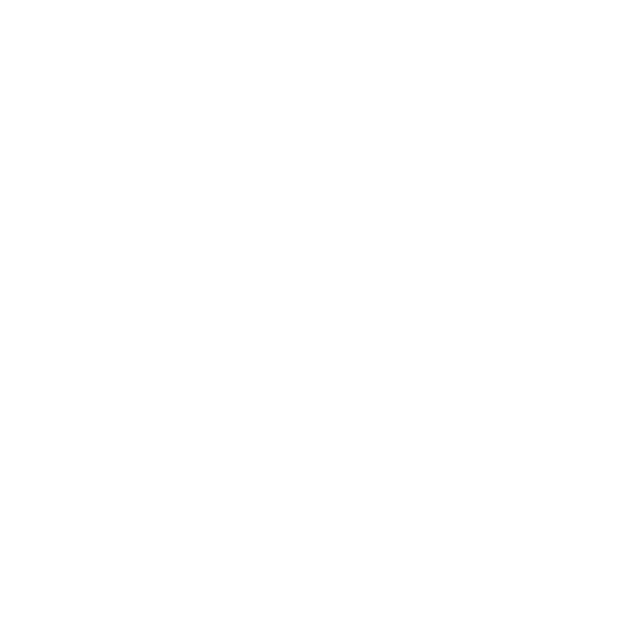

In [13]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn import neighbors
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


N_SAMPLES = 1000
N_CENTERS = 4
np.random.seed(22222222)

# create a random dataset
X, labels_true = make_blobs(n_samples=N_SAMPLES, centers=N_CENTERS, cluster_std=1)
transformation = [[0.6, -0.6], [-0.4, 0.9]]
X = np.dot(X, transformation)

X_train, X_test, y_train, y_test = train_test_split(X, labels_true, 
                                                    test_size=0.33, 
                                                    random_state=42)


kNN = neighbors.KNeighborsClassifier(n_neighbors=10)
    
kNN.fit( X_train ,y_train)

y_pred = kNN.predict( X_test )

# compute Accuracy
print ("Accuracy:", accuracy_score(y_true=y_test, y_pred=y_pred) )
    
# plot
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X_train[:,0], X_train[:,1], c=y_train, alpha=0.1)
ax.scatter(X_test[:,0], X_test[:,1], c=y_test, marker='+')

Let's show the decision boundary

<IPython.core.display.Javascript object>


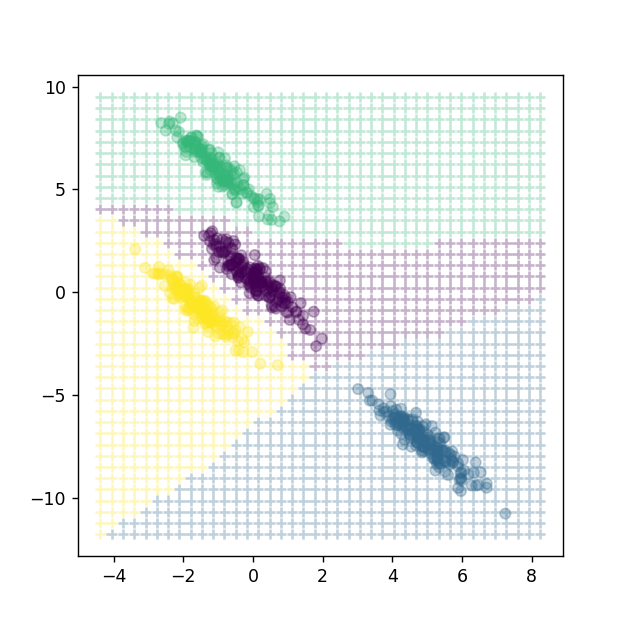

In [14]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn import neighbors
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


N_SAMPLES = 1000
N_CENTERS = 4
np.random.seed(22222222)

# create a random dataset
X, labels_true = make_blobs(n_samples=N_SAMPLES, centers=N_CENTERS, cluster_std=1)
transformation = [[0.6, -0.6], [-0.4, 0.9]]
X = np.dot(X, transformation)

X_train, X_test, y_train, y_test = train_test_split(X, labels_true, 
                                                    test_size=0.33, 
                                                    random_state=42)


kNN = neighbors.KNeighborsClassifier(n_neighbors=10)
    
kNN.fit( X_train ,y_train)


x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
zz = [ [xx,yy] for xx in np.linspace(x_min, x_max, 40) 
               for yy in np.linspace(y_min, y_max, 40) ]
zz = np.array(zz)
z_labels = kNN.predict(zz)

# plot
fig, ax = plt.subplots(figsize=(5,5))

ax.scatter(zz[:,0], zz[:,1], c=z_labels, marker='+', alpha=0.3)

ax.scatter(X_train[:,0], X_train[:,1], c=y_train, alpha=0.3)

## References

- **Data Mining Concepts and Techniques Third Edition**. Jiawei Han, Micheline Kamber Jian Pei.  Morgan Kaufmann/Elsevier. Third Edition. 2012.
  - Chapter 9.5: Lazy Learners (not including 9.5.2)
  